# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

## Step1. 下載資料

In [3]:
breast_cancer=datasets.load_breast_cancer()

data=breast_cancer.data
target=breast_cancer.target

# print(X,y)
# breast_cancer.target_names
# breast_cancer.feature_names

# print(len(X[:]))
# a=(breast_cancer.target)
# b=(breast_cancer.feature_names)
# print(a,b)

In [4]:
labels=breast_cancer.target_names[breast_cancer.target]


bad_breast_radius=data[labels=='malignant',0]
bad_breast_area=data[labels=='malignant',3]
bad_breast=np.c_[bad_breast_radius,bad_breast_area]
bad_breast

good_breast_radius=data[labels=='benign',0]
good_breast_area=data[labels=='benign',3]
good_breast=np.c_[good_breast_radius,good_breast_area]
good_breast

# labels

array([[ 13.54 , 566.3  ],
       [ 13.08 , 520.   ],
       [  9.504, 273.9  ],
       [ 13.03 , 523.8  ],
       [  8.196, 201.9  ],
       [ 12.05 , 449.3  ],
       [ 13.49 , 561.   ],
       [ 11.76 , 427.9  ],
       [ 13.64 , 571.8  ],
       [ 11.94 , 437.6  ],
       [ 11.52 , 409.   ],
       [ 13.05 , 527.2  ],
       [  8.618, 224.5  ],
       [ 10.17 , 311.9  ],
       [  8.598, 221.8  ],
       [  9.173, 260.9  ],
       [  9.465, 269.4  ],
       [ 11.31 , 394.1  ],
       [  9.029, 250.5  ],
       [ 12.78 , 502.5  ],
       [  8.888, 244.   ],
       [ 12.31 , 470.9  ],
       [ 13.53 , 559.2  ],
       [ 12.86 , 506.3  ],
       [ 11.45 , 401.5  ],
       [ 13.34 , 520.   ],
       [ 12.   , 443.3  ],
       [ 12.36 , 466.1  ],
       [ 14.64 , 651.9  ],
       [ 14.62 , 662.7  ],
       [ 13.27 , 551.7  ],
       [ 13.45 , 555.1  ],
       [ 12.18 , 451.1  ],
       [  9.787, 294.5  ],
       [ 11.6  , 412.6  ],
       [  6.981, 143.5  ],
       [ 12.18 , 458.7  ],
 

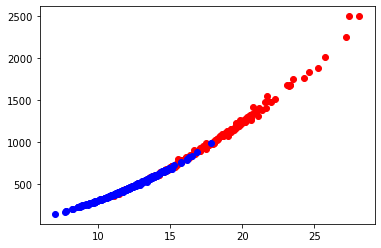

In [6]:
plt.scatter(bad_breast[:,0],bad_breast[:,1],color='red')
plt.scatter(good_breast[:,0],good_breast[:,1],color='blue')

In [7]:
X=np.r_[bad_breast, good_breast]
y=np.r_[np.zeros(len(bad_breast)),np.ones(len(good_breast))]

## Step2. 區分訓練集與測試集

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [11]:
clf=svm.SVC(kernel='rbf',gamma='auto',C=10)
clf.fit(X_train,y_train)

SVC(C=10, gamma='auto')

In [10]:
clf2=svm.LinearSVC()
clf2.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [12]:
def SVM_plot(clf,title):
    training_x_min=X[:,0].min()-1
    training_x_max=X[:,0].max()+1
    training_y_min=X[:,1].min()-1
    training_y_max=X[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf2.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(good_breast[:,0],good_breast[:,1],color='red')
    plt.scatter(bad_breast[:,0],bad_breast[:,1],color='blue')
    plt.title(title)
    plt.show()

KeyboardInterrupt: 

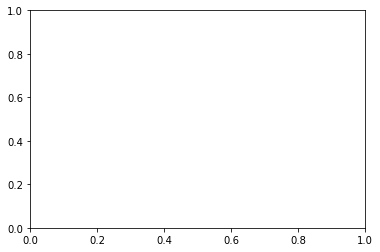

In [13]:
SVM_plot(clf2,'rbf')

NameError: name 'title' is not defined

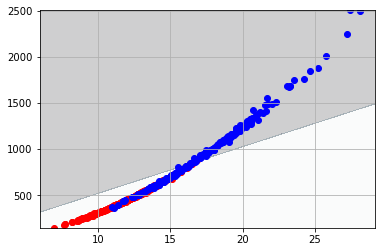

In [21]:
    training_x_min=X[:,0].min()-1
    training_x_max=X[:,0].max()+1
    training_y_min=X[:,1].min()-1
    training_y_max=X[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf2.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(good_breast[:,0],good_breast[:,1],color='red')
    plt.scatter(bad_breast[:,0],bad_breast[:,1],color='blue')
#     plt.title(title)
    plt.show()

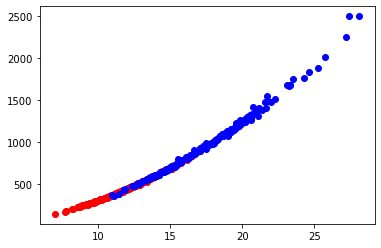

In [22]:
    plt.scatter(good_breast[:,0],good_breast[:,1],color='red')
    plt.scatter(bad_breast[:,0],bad_breast[:,1],color='blue')

## Step4. 預測

```

```


In [48]:
clf.predict(X_test)
clf2.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

## Step5. 準確度分析

In [50]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))
print("________________________")
print(clf2.score(X_train,y_train))
print(clf2.score(X_test, y_test))

0.9773869346733668
0.6432748538011696
________________________
0.6507537688442211
0.6900584795321637


In [ ]:
##linear效果不佳，可能須嘗試其他特徵或方法